![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [2]:
#kerakli kutubxonalar
import numpy as np
import sklearn # scikit-learn kutubxonasi
import matplotlib.pyplot as plt
import seaborn as sns

# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

# **Ma'lumotlarni tahlil qilish**

In [3]:
# ko'rinib turibdiki size, price object tipida ekan ularni floatga o'tkazamiz
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [4]:
df.isnull().sum()

location      0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

In [6]:
df_num = df.drop(['location', 'district'], axis=1)
# Convert all columns to numeric
df_num = df_num.apply(pd.to_numeric, errors='coerce')

In [7]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rooms       7565 non-null   int64  
 1   size        7564 non-null   float64
 2   level       7565 non-null   int64  
 3   max_levels  7565 non-null   int64  
 4   price       7466 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 295.6 KB


In [8]:
#nan qiymatlarni sonini ko'rish
df_num.isna().sum()

rooms          0
size           1
level          0
max_levels     0
price         99
dtype: int64

In [13]:
# nan qiymatlarni tashlab yuborish
df_num = df_num.dropna()
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7465 entries, 0 to 7564
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rooms       7465 non-null   int64  
 1   size        7465 non-null   float64
 2   level       7465 non-null   int64  
 3   max_levels  7465 non-null   int64  
 4   price       7465 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 608.0 KB


In [15]:
df_num.describe()

,rooms,size,level,max_levels,price
count,7465.000000,7465.000000,7465.000000,7465.000000,7.465000e+03
mean,2.622103,113.537018,3.693771,6.023979,7.132367e+04
std,1.083155,1501.157996,2.236905,2.607103,6.405659e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,65.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,85.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


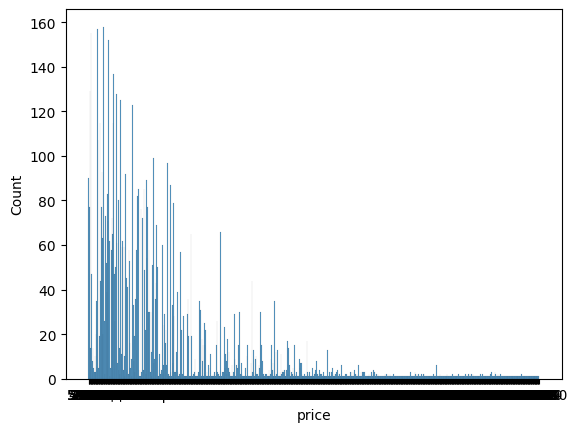

In [17]:
sns.histplot(df,x='price')
plt.show()

In [21]:
df_num=df_num[df_num['price']<200000]
df_num=df_num[df_num['size']<1000]
df_num.describe()

,rooms,size,level,max_levels,price
count,7292.000000,7292.000000,7292.00000,7292.000000,7292.000000
mean,2.580362,111.369506,3.69062,5.994103,53967.968047
std,1.036960,1518.580382,2.23702,2.598089,29317.774021
min,1.000000,1.000000,1.00000,1.000000,2.000000
25%,2.000000,50.000000,2.00000,4.000000,34675.000000
50%,2.000000,65.000000,3.00000,5.000000,45500.000000
75%,3.000000,83.000000,5.00000,9.000000,65000.000000
max,10.000000,70000.000000,19.00000,25.000000,198750.000000


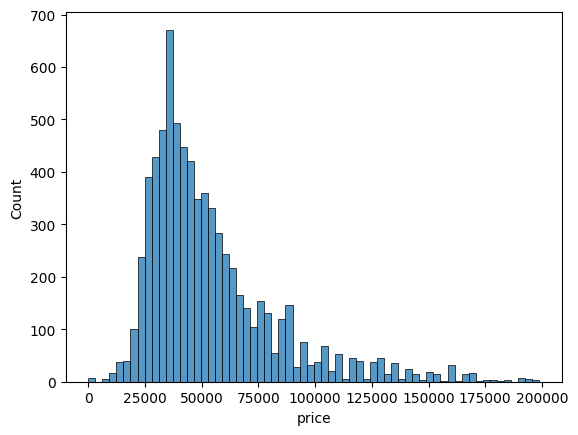

In [23]:
sns.histplot(df_num,x='price')
plt.show()

In [26]:
df_num = df_num[df_num['size']<150]
df_num.describe()

,rooms,size,level,max_levels,price
count,7140.000000,7140.000000,7140.000000,7140.000000,7140.000000
mean,2.537675,67.852919,3.676050,5.966947,52472.317507
std,0.988721,24.448433,2.229754,2.592840,26973.988175
min,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,50.000000,2.000000,4.000000,34500.000000
50%,2.000000,65.000000,3.000000,5.000000,45000.000000
75%,3.000000,80.000000,5.000000,9.000000,63000.000000
max,6.000000,148.000000,19.000000,25.000000,195000.000000


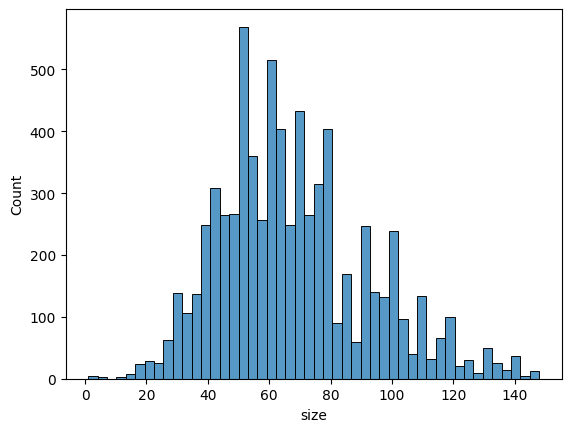

In [27]:
sns.histplot(df_num,x='size')
plt.show()

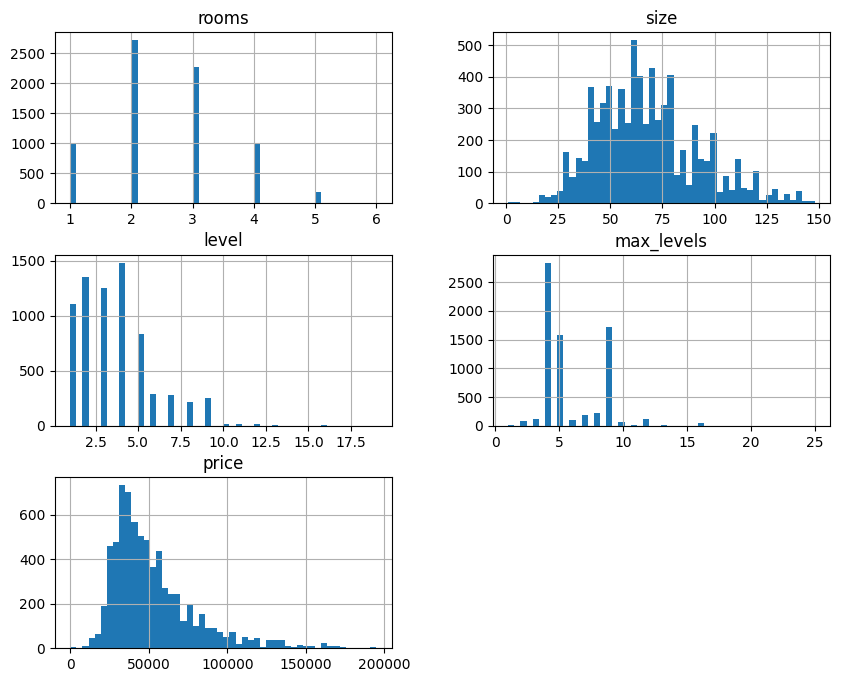

<bound method hist_frame of       rooms  size  level  max_levels    price
0         3  57.0      4           4  52000.0
1         2  52.0      4           5  56000.0
2         2  42.0      4           4  37000.0
3         3  65.0      1           4  49500.0
4         3  70.0      3           5  55000.0
...     ...   ...    ...         ...      ...
7560      1  38.0      5           5  24500.0
7561      2  49.0      1           4  32000.0
7562      2  64.0      3           9  40000.0
7563      1  18.0      1           4  11000.0
7564      1  30.0      2           4  22914.0

[7140 rows x 5 columns]>

In [32]:
%matplotlib inline
df_num.hist( bins=50, figsize=(10,8))
plt.show()
df_num.hist

**price ustuni size, rooms, max_levels ustunlari bilan kuchli bog'langan ekan**

In [30]:
df_num.corrwith(df_num['price']).sort_values(ascending=False)

price         1.000000
size          0.763492
rooms         0.582306
max_levels    0.254879
level         0.070493
dtype: float64

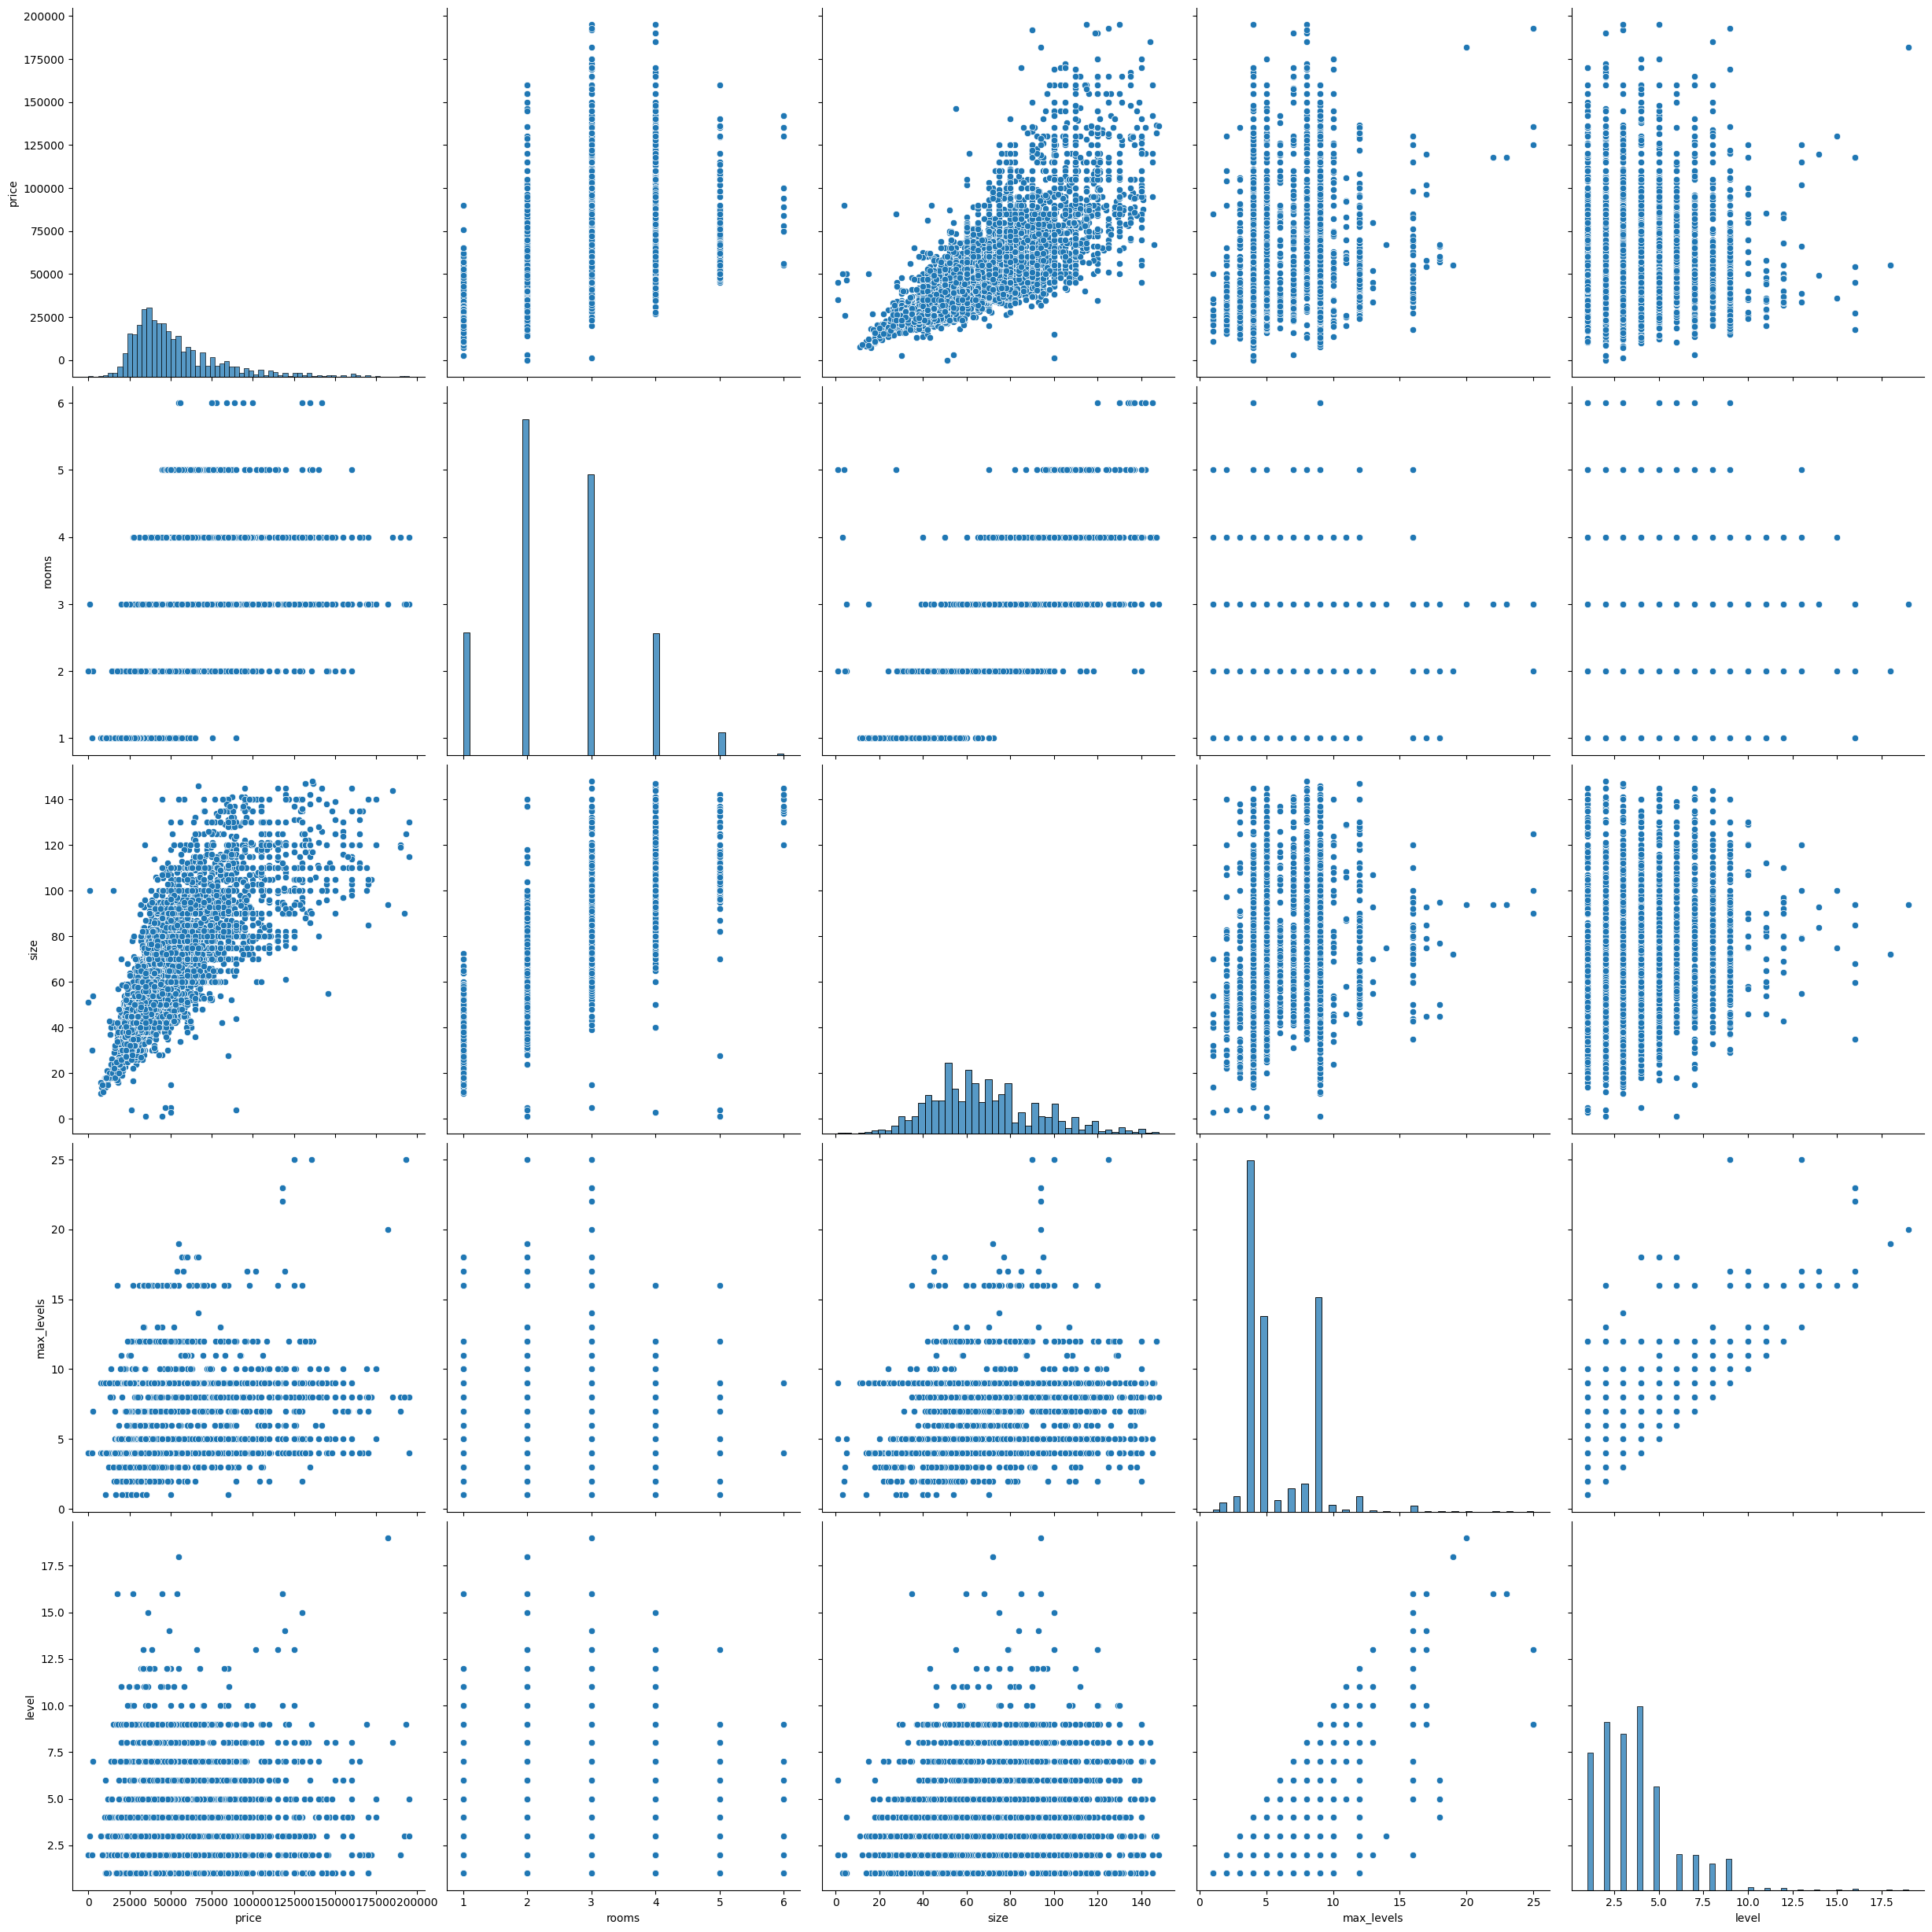

In [43]:
cols = ['price', 'rooms', 'size', 'max_levels', 'level']
sns.pairplot(df_num[cols], height=5)
plt.show()

**Yangi ustunlar qo'shamiz va ular price bilan yaxshi korellatsiyaga erishsa ularni yangi ustun qilib, transformer yordamida qo'shamiz**

In [41]:
#df_num['rooms_level'] = df_num['rooms'] / df_num['level']
#df_num.corrwith(df_num['price']).sort_values(ascending=False)

price          1.000000
size           0.763492
rooms          0.582306
size_level     0.362291
rooms_level    0.297117
max_levels     0.254879
level          0.070493
dtype: float64

In [42]:
#df_num['size_level'] = df_num['size'] / df_num['level']
#df_num.corrwith(df_num['price']).sort_values(ascending=False)

price          1.000000
size           0.763492
rooms          0.582306
size_level     0.362291
rooms_level    0.297117
max_levels     0.254879
level          0.070493
dtype: float64

In [45]:
#df_num = df_num.drop(['rooms_level', 'size_level'], axis=1)

In [46]:
df_num

,rooms,size,level,max_levels,price
0,3,57.0,4,4,52000.0
1,2,52.0,4,5,56000.0
2,2,42.0,4,4,37000.0
3,3,65.0,1,4,49500.0
4,3,70.0,3,5,55000.0
...,...,...,...,...,...
7560,1,38.0,5,5,24500.0
7561,2,49.0,1,4,32000.0
7562,2,64.0,3,9,40000.0
7563,1,18.0,1,4,11000.0


# **Machine learning uchun pipline yordamida datasetni tayyorlash. Data ni train va test qismiga ajratamiz**

In [47]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_num, test_size=0.2, random_state=42)

X_train = train_set.drop("price", axis=1)
y = train_set["price"].copy()

#housing_num = housing.drop("ocean_proximity", axis=1)

**CombinedAttributesAdder ni yasash**

In [51]:
from sklearn.base import BaseEstimator, TransformerMixin
# bizga kerak ustunlar indekslari
rooms_ix, size_ix, level_ix = 0, 1, 2

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # bizni funksiyamiz faqat transformer. estimator emas
    def transform(self, X):
        X = X.values # DataFrame ni NumPy array ga o'zgartiramiz
        rooms_level = X[:, rooms_ix] / X[:, level_ix]
        size_level = X[:, size_ix] / X[:, level_ix]
        return np.c_[X, rooms_level, size_level]
        # np.c_ ustunlarni birlashtiradi

In [52]:
# Agar model yaxshi ishlamasa district ustunini ham qo'shaman OneHotEncoder yordamida

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([
          ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room = True)),
          ('std_scaler', StandardScaler())
])

In [53]:
X_prepared = num_pipeline.fit_transform(X_train)

In [54]:
X_prepared[0:5,:]

array([[ 0.47664301, -0.52110489,  0.14048697, -0.76172961, -0.29783578,
        -0.60340791],
       [-0.54000556, -0.43870331,  1.03310275,  1.15517916, -0.81361344,
        -0.80856008],
       [-1.55665414, -1.55112465,  0.14048697, -0.76172961, -0.91676898,
        -0.90510229],
       [ 1.49329159,  1.82734018,  0.14048697,  1.15517916,  0.01163082,
         0.08445527],
       [ 0.47664301,  1.12692674,  0.14048697, -0.76172961, -0.29783578,
        -0.1206969 ]])

# **Machine Learning**

**Linear Regression - Chiziqli regressiya**

In [55]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_prepared, y)

LinearRegression()

In [56]:
# tasodifiy 5 ta qatorni ajratib olamiz
test_data = X_train.sample(5)
test_data

,rooms,size,level,max_levels
1716,2,51.0,5,5
3389,3,78.0,3,4
6032,2,42.0,2,5
5065,2,60.0,4,4
1791,5,116.0,3,9


In [57]:
# yuqoridagi qatorlarga mos keluvchi narxlarni ajratib olamiz (biz aynan shu qiymatlarni bashorat qilishimiz kerak)
test_label = y.loc[test_data.index]
test_label

1716    53000.0
3389    55000.0
6032    33500.0
5065    62000.0
1791    87000.0
Name: price, dtype: float64

In [58]:
test_data_prepared = num_pipeline.transform(test_data)
test_data_prepared

array([[-0.54000556, -0.68590805,  0.58679486, -0.37834786, -0.73108902,
        -0.77477031],
       [ 0.47664301,  0.4265133 , -0.30582092, -0.76172961,  0.01163082,
        -0.01208693],
       [-0.54000556, -1.05671517, -0.75212881, -0.37834786,  0.01163082,
        -0.25344243],
       [-0.54000556, -0.31510093,  0.14048697, -0.76172961, -0.60730238,
        -0.54306903],
       [ 2.50994016,  1.99214334, -0.30582092,  1.15517916,  0.83687509,
         0.59934701]])

In [59]:
predicted_data = lin_reg.predict(test_data_prepared)
predicted_data

array([35040.53829764, 59161.91898335, 31124.29407573, 44766.41958949,
       90937.9493281 ])

In [60]:
pd.DataFrame({'Prognoz':predicted_data, 'Real baxosi': test_label})

,Prognoz,Real baxosi
1716,35040.538298,53000.0
3389,59161.918983,55000.0
6032,31124.294076,33500.0
5065,44766.419589,62000.0
1791,90937.949328,87000.0


# **Endi test_set bilan modelni baholaymiz**

In [61]:
test_set

,rooms,size,level,max_levels,price
3194,2,54.00,4,4,41500.0
5600,2,50.00,4,4,33500.0
6154,3,70.00,4,4,70500.0
723,3,93.00,4,7,46500.0
1482,2,42.00,5,5,31500.0
...,...,...,...,...,...
59,3,98.00,2,4,68000.0
7558,1,32.00,4,5,25000.0
819,2,56.00,4,5,29600.0
2674,4,77.32,2,5,55000.0


In [62]:
X_test = test_set.drop('price', axis=1)
y_test = test_set['price'].copy()

In [63]:
X_test_prepared = num_pipeline.transform(X_test)

In [64]:
y_predicted = lin_reg.predict(X_test_prepared)

In [65]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

17874.1605559541


# **Decision tree**

In [66]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_prepared, y)

DecisionTreeRegressor()

In [67]:
y_predicted = Tree_model.predict(X_test_prepared)

In [68]:
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

17767.38696795087


# **Random Forest**

In [69]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, y)

RandomForestRegressor()

In [70]:
y_predicted = RF_model.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

15402.374427663488


# **Modelni saqlash**

In [72]:
import pickle

filename = 'lin_reg_model.pkl' # faylga istalgan nom beramiz
with open(filename, 'wb') as file:
    pickle.dump(lin_reg, file)

In [ ]:
#modelni o'qish

"""with open(filename, 'rb') as file:
    model = pickle.load(file)
"""

In [73]:
filename = 'Tree_model.pkl' # faylga istalgan nom beramiz
with open(filename, 'wb') as file:
    pickle.dump(Tree_model, file)

In [74]:
filename = 'RF_model.pkl' # faylga istalgan nom beramiz
with open(filename, 'wb') as file:
    pickle.dump(RF_model, file)

**Dataset uchun Random Forest modeli uchun xatolik 15402 ga teng bo'ldi. LinearRegression 17874, Decision Tree 17767 ga teng bo'ldi**